### Statistical and Stochastic Methods in Hydrology;  Lecture 3: Properties of Random Variables



*Outline for the day*

* Review Lecture 2
* Discrete Distributions in Earth Sciences
    - Hypergeometric distribution
    - Bernoulli Trials (Binomial distribution & Geometric distribution & Negative Binomial distribution)
    - Poisson Process and distribution
* Wrap-up review


Review of Lecture 2: Main Descriptors of Random Variables
-------------------------------------------------------------

The $p.m.f.$ and $c.d.f.$ provide useful tools for describing the
probability properties of a random variable, however, there are some
general characteristics that are also of interest. These include:

-   the *central* or *Expected Value*
-   the *Variance*

**keep in mind that two random variables may have the
same mean, median, or otherwise, but their probability distributions may
be quite different.**

### Expected Value of a Random Variable

#### Discrete Case & Continuous Case

The expected value, expectation, or mean of a *discrete* random variable with a
**probability mass function**, \$ P(X = x\_i ) = p\_i\$ is:

$$E(X) = \sum_x {p_i  x_i}$$

For the *continuous* case, the expected value is simply the integral of
the $p.d.f.$:

$$E(X) = \int_{-\infty}^\infty {x \cdot f(x)dx}$$

Some notes for when we cover the *Method of Moments* - The expected
value of $(x- \mu)^i$ is equal to the $i^{th}$ central moment
$E[(x- \mu)^i ] = μ_i$ ; later on we will show that when $i = 2$, $μ_i$
is the variance.

-   The expected value of $x^i$ is equal to the $i^{ th}$ moment about
    origin $E[x^i ] = μ_i$

### Measures of Central Tendency

* Arithmatic Mean
* Geometric Mean
* Weighted Mean
* Median
* Mode

### Measures of Dispersion

* Range
* Variance

Variance provides a more robust measure of the variability of a
population. The variance is a non-negative number given us insight into
how widely distributed the values of the random variable are likely to
be. If we have very high variance, it decreases the 'chance' that we
will draw the central value. In other words, the $x_i$ are more
scattered within the the distribution. Think of *Variance* \~
*variability*. We symbolize variance with $Var(X) \ or \ V(X)$ or
$\sigma^2$

$$V(X) = \sigma^2 = E[X-E(X)]^2 = E(x-\mu)^2 = \int (x-\mu)^2 f(x)dx$$

Note that the variance is also the **second central moment** or , $u_2$.

* Coefficient of Variation

### Measures of Symmetry

* Skewness
* Kurtosis


Lecture 3: Discrete Distributions
-------------------------------------------------------------

What is it that we are trying to accomplish with the *Descriptors of a Random Variable*? You may have a variable in your model for which you don't have actual data and cannot derive from first principles (e.g. physical processes). It may be that our variable would be too complex to model, or we simply don't have a model for it. Hopefully, however, you have some information on this variable, and perhaps that comes in the form of a *distribution*. The *distribution* then, is simply the description of the probability of observation for that variable.

There are some distributions that are well known and used often to help us describe a random variable of interest. The usefulness of the distribution stems from the following reasons: (1) The function is the result of an underlying physical process and is derived on the basis of certain physically reasonable assumptions; (2) the function is the result of some limiting process; and (3) it is widely known and the necessary statistical information is available.

In prior days, before we all had access to computers, these distributions were analytically derived and calculated and the resulting probabilities were made available in the form of tables (yes, like on paper...). These tables were used in calculations -- given a look-up value, one could go to a probability table and find the statistics that were relevant for that value.

Today, we rely on computers. Let's take a look...


## Hypergeometric distribution

We use the hypergeometric function when selecting values from a finite population with binary values (for example "good" and "bad").

The hypergeometric distribution is drawing objects from a bin of $M$ elements.
$M$ is the total number of objects, $n$ is total number of Type I objects in the bin, or you could think of objects with a certain property -- say blue eyes vs. brown eyes. The random variate, $x$ represents the number of Type I objects in $N$ samples drawn without replacement from the total population.


**Note: our notebooks are currently unable to render the math code below, see the compendium**
The probability mass function is defined as:

    f_x(x; M,N,n) = {\binom{n x}\binom{M-n}{N-x}\over{\binom M N}}
    

The cumulative distribution function that is defined as:

    F_x(x; M,N,n) ={ \sum_{i=0}^x( \binom n i \binom{M-n}{N-i})\over\binom M N }


The $E(x)$, or **expected value** is given by:

$$ E(x) = {n*k\over N}$$


The **variance** is given by:

$$Var(x) ={ n*k(N-k)(N-n)\over N^2 * (N-1)}$$


### Examples


In [53]:
from IPython.display import Latex, Math
Math(r'''f_x(x; M,N,n) = \binom{\binom{n x}\binom{M-n}{N-x}}{\binom M N}''')

<IPython.core.display.Math object>

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We are considering the following:

Assumptions for binomial distribution | 
------------ |
1. There is a population of $M$ items divided into two groups (blue or brown), $n$ of which are belonging to one group (blue) and $M-n$ belong to the other group (brown).|
2. A random sample (without replacement) of $N$ items is taken from the $M$ items.|
3. Probability of getting $x$ successes (blue eyes) in $N$ trials; which is given by $f_x(x; M, N, n)$|

### Rainy days in Uppsala
*Note this is compendium example 3.1*

Historical data show that there are 10 rainy days in June in Uppsala. Assume the rainy days are independent (*is this a fair assumption?*). You want to go to the field for a week to measure rainfall intensity.

a. What is the probability of 4 rainy days in 7 randomly selected days in June?
b. What is the probability that less than 4 of these randomly selected days are rainy?

**Solution**

0.11759504863


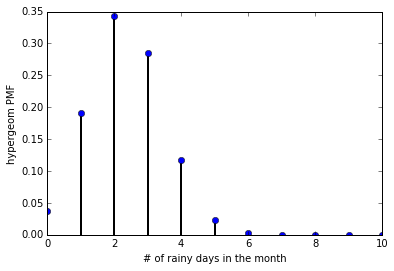

In [55]:
from scipy.stats import hypergeom
[M, n, N] = [30, 10, 7]

rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
f_x = rv.pmf

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f_x(x), 'bo')
ax.vlines(x, 0, f_x(x), lw=2)
ax.set_xlabel('# of rainy days in the month')
ax.set_ylabel('hypergeom PMF')

print(f_x(4))


0.856763925729


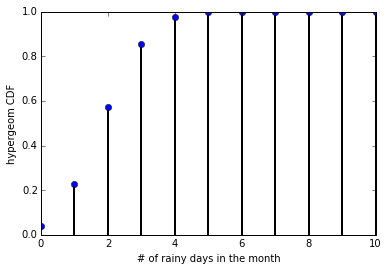

In [56]:
#let's look at case b... cumulative distribution.

F_x = rv.cdf
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, F_x(x), 'bo')
ax.vlines(x, 0, F_x(x), lw=2)
ax.set_xlabel('# of rainy days in the month')
ax.set_ylabel('hypergeom CDF')

# Note that we asked, **less than 4**, so we have to look at the CDF=3
print(F_x(3))

## Bernoulli Trials

When we are considering events that *may* or *may not* occur, such as, for example, the annual maximum flow of a river exceeding a certain specified flood level, then we can consider the number of events in the sequence *trials*. In general, there will be only two outcomes, and we consider this a Bernoulli Process.

Note that if we consider the exceedence of a flood level, we are considering *the maximum discharge over the year* against the specific level. That is, our trial occurrs once per year and we are going to ask, "What is the probability of the maximum discharge for the year exceeding the flood level?". We are not considering whether at any time, the river will exceed the specified level -- this is a different question.

Our **Bernoulli sequence** is a model that is based on the following assumptions:

1. Each trial has only two possible outcomes: the *occurrence* or *non-occurrence* of an event.
2. The probability of occurrence of the event in each trial is constant.
3. The trials are statistically independent.

In our example, we're assuming then that the likelyhood of the river's maximum discharge exceeding the specified flood level from one year to the next is independent, and each year the probability of exceeding the flood level is constant, then *the annual maximum floods over a series of years* constitutes a *Bernoulli sequence*.

There are a few distributions that we use to work with the Bernoulli sequence. The main ones are the **binomial** distribution, the **geometric** distribution, and the **negative binomial** distribution. To understand how these are used, it is best to understand the underlying assumptions for each type of distribution.

### Binomial distribution
The *Bernoulli sequence*, named after [James Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli) is one of the simplest but most important random processes in probability.

Assumptions for binomial distribution | 
------------ |
1. There are n trials, each classifiable as 'success' or 'failure' |
2. The trials are independent (draw a sample *with* replacement, __which is different from hypergeometric__) |
3. Probability of getting $x$ successes (elements with property $k$) is $n$ trials? |

**Note: our notebooks are currently unable to render the math code below, see the compendium**

The $p.m.f.$ has the general form:

    f_x(x; n, p) = \binom n x p^x q^{n-x}

Where $x$ is the number of successes, $n$ is the number of trials, and $p$ is the probability of one success. 

The $c.d.f.$ has the form:
    
    F_x(x; n,p) = \sum_{x=0}^x \binom n i p^i q^{n-i}
    
The $E(x)$ is given by:

$$ E(x) = np$$

and:

$$Var(x) =npq$$

We can also calculate a **coefficient of skewness**:

$$\gamma_x = {p-q\over \sqrt{npq}}$$


### Examples


### Runoff Exceedence
*Note this is compendium example 3.5*

The probability of runoff exceeding a certain limit for any given year is $p$. Suppose the exceedance of runoff in any year is independent.

a. What is the probability the runoff will exceed this limit once in three years?

**Solution**

This is an analytical question, as you would require the value of $p$ the calculate it. So, let's take a look at the analytical solution:

Let $q=1-p$ be the probability of runoff **not** exceeding its limit in a year.

Also, let's look back at keywords in the question, "**once in three years**". So, there we've already established that this 'event' is only going to happen one time. 
Then we have three possible arrangements that give us probabilities of events

$pqq$ (exceed in year 1), $qpq$ (exceed in year 2), and $qqp$ (exceed in year three)

Now recall, from Lecture 1 that the joint probability of three independent events is simply $P(A \cup B \cup C) = P(A) + P(B) + P(C)$, since in any one year the maximum discharge can exceed ($p$) or *not exceed* ($q$) the flood limit.

Let's call event a, the probability of exceeding one time in 3 years. Then we have:
$$P(a) = pqq + qpq + qqp = 3pq^2$$

A more general form:

    $$P(a) = \binom 3 1 p^1 q^{3-1} = {3!}\over{1!(3-1)!)} p^1q^2 $$


### Balls in a box
*Note this is compendium example 3.6*

A box contains 1000 balls, of which 200 are red balls. Let's perform an experiment in such a way that each time a ball is taken from the box in random, its colr is observed and then the ball is put back (*replacement!*). What is the probability of getting 10 red balls in the 100 trials?

**Solution**

Okay, in this case we have some numbers to play with....

0.00336281996958


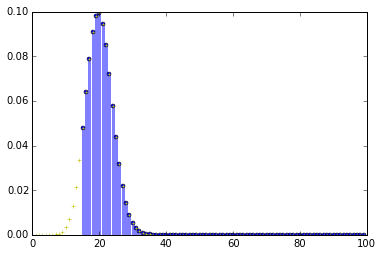

In [74]:
from scipy.stats import binom

#Note the probability mass function for the binomial distribution
#is defined in the "standardized" form, see docs for more details.

n, p = 100, 200/1000.
x = 10

f_x = binom(n, p).pmf

print(f_x(x))

# let's look a bit closer

X = np.arange(binom.ppf(.1, n, p), binom.ppf(1, n, p))
X2 = np.arange(100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, f_x(X), 'bo', ms=4, label='binom pmf')
ax.plot(X2, f_x(X2), 'y+', ms=4, label='binom pmf')

ax.vlines(X, 0, f_x(X), colors='b', lw=3, alpha=0.5)

#### References / Notes

Concepts and Examples are based on

1. Ang H-S.A., Tang W.H.; Probability Concepts in Engineering Planning and Design, Volume 1: Basic Principles <http://books.google.no/books/about/Probability_Concepts_in_Engineering_Plan.html?id=EIRRAAAAMAAJ&redir_esc=y>
2. Haan, C.; Statistical Methods in Hydrology 2nd. Edition. 